### Demonstration
This notebook measures the frequency response of an electronic bandpass filter that passes the frequency range 9.5-11.5 MHz.  The spectrum analyzer is set to measure power in dBm.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import visa

In [2]:
import wanglab_instruments as wl

##### Helper function:

Convenience function to convert dBm power to mW

In [3]:
def unlog(y):
    return 10**(y/10)

###### Visa resources 

Creat visa Resource Manager and list available resources.  The spectrum analyzer is set to GPIB address 1, and the function generator to GPIB address 15

In [4]:
rm = visa.ResourceManager()

In [5]:
rm.list_resources()

(u'TCPIP0::10.10.1.128::INSTR',
 u'GPIB0::1::INSTR',
 u'GPIB0::4::INSTR',
 u'GPIB0::8::INSTR',
 u'GPIB0::11::INSTR',
 u'GPIB0::15::INSTR',
 u'GPIB0::19::INSTR',
 u'GPIB0::20::INSTR',
 u'GPIB0::21::INSTR')

In [6]:
# Instantiate Tek5103 object
rsa = wl.spectrum_analyzers.Tek5103(rm.open_resource('GPIB0::1::INSTR'))

In [7]:
# Instantiate Hp8647 object
hp = wl.function_generators.Hp8647(rm.open_resource('GPIB0::15::INSTR'))

In [8]:
# Set frequency range for analysis
rsa.start_freq = 1
rsa.stop_freq = 21
# Let the spectrum analyer set the resolution bandwidth automatically
rsa.rbw_auto = 1
# Set no averaging on trace1
rsa.set_averaging(1,1)

In [9]:
# Set the output power of the function generator to -50 dBm
hp.pow = -50
# Turn on signal
hp.rf_on = 1

In [10]:
# Measure response r through filter at test frequencies f
f = np.linspace(1,21,150)
r = np.zeros(len(f))
for i in range(len(f)):
    # Set the output frequency of the function generator
    hp.frequency = f[i] 
    # Start acquisition and acquire spectrum
    rsa.restart_acquire()
    x, y = rsa.read_spectrum(1)
    # Measure the peak frequency response
    r[i] = np.max(y)

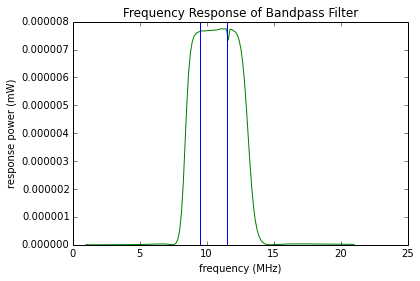

In [12]:
# Vertical lines correspond to the filters quoted frequency band
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(f,unlog(r),color='green')
ax.axvline(9.5)
ax.axvline(11.5)
ax.set_xlabel(r'frequency (MHz)')
ax.set_ylabel(r'response power (mW)')
ax.set_title('Frequency Response of Bandpass Filter')